In [1]:
import dataparser
import utils
import plot_utils
import time
from collections import defaultdict

## Load dataset(s) and show some basic stats

In [2]:
datasets=set()

wes_title='wes2015'
wes_file="data/wes2015-dataset-nif-1.2.rdf"
limit=100000000

wes_articles=dataparser.load_article_from_nif_file(wes_file, limit=limit, collection=wes_title)
print('WES2015: %d articles loaded!' % len(wes_articles))

aida_title='aida'
aida_file='data/AIDA-YAGO2-dataset_topicsLowlevel.tsv'

aida_articles=dataparser.load_article_from_conll_file(aida_file)

print('AIDA: %d articles loaded!' % len(aida_articles))

WES2015: 366 articles loaded!
AIDA: 1393 articles loaded!


In [3]:
num_mentions_wes = sum(len(article.entity_mentions) for article in wes_articles)
print("WES2015: %d mentions in total!" % num_mentions_wes)

num_mentions_aida = sum(len(article.entity_mentions) for article in aida_articles)
print("AIDA: %d mentions in total!" % num_mentions_aida)

WES2015: 28587 mentions in total!
AIDA: 34929 mentions in total!


### Distribution of AIDA collections 

In [4]:
d=defaultdict(int)
for article in aida_articles:
    d[article.collection]+=1
d

defaultdict(int, {'aidatesta': 216, 'aidatestb': 231, 'aidatrain': 946})

In [5]:
t1=time.time()
#print(example_article.identifier)
wes_cnt=plot_utils.get_mention_counts(wes_articles)
aida_cnt=plot_utils.get_mention_counts(aida_articles)
aida_cnt.pop('--NME--', None)
print(aida_cnt)
t2=time.time()
print(t2-t1)

Counter({'United_States': 636, 'Germany': 354, 'Russia': 308, 'France': 299, 'United_Kingdom': 280, 'London': 234, 'Italy': 215, 'Australia': 204, 'Israel': 194, 'Iraq': 185, 'People\\u0027s_Republic_of_China': 183, 'Spain': 178, 'Netherlands': 160, 'England': 159, 'Japan': 153, 'New_York_City': 144, 'Belgium': 129, 'Sweden': 121, 'Bill_Clinton': 116, 'Reuters': 110, 'Canada': 109, 'Europe': 109, 'Poland': 102, 'India': 100, 'Chechnya': 94, 'Brazil': 93, 'United_Nations': 88, 'Czech_Republic': 87, 'Austria': 86, 'Switzerland': 84, 'Islam': 83, 'England_cricket_team': 82, 'South_Africa': 78, 'Pakistan_national_cricket_team': 78, 'Hong_Kong': 77, 'Moscow': 76, 'Iran': 73, 'Chicago': 72, 'Indonesia': 69, 'Yasser_Arafat': 68, 'Boris_Yeltsin': 68, 'New_York_Yankees': 66, 'Scotland': 66, 'Chicago_White_Sox': 65, 'Greenwich_Mean_Time': 64, 'Alexander_Lebed': 64, 'South_Korea': 63, 'Paris': 60, 'Baltimore_Orioles': 60, 'Los_Angeles_Angels_of_Anaheim': 60, 'Australia_national_cricket_team': 60,

### Plot frequency distributions

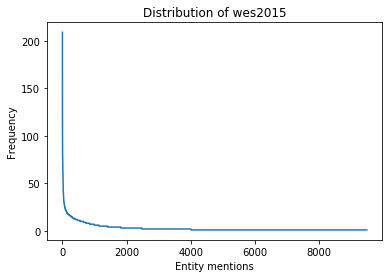

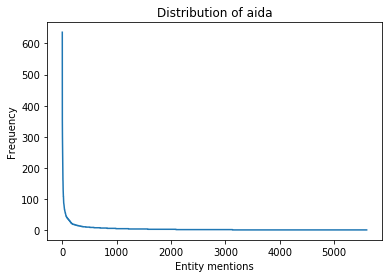

In [6]:
plot_utils.plot_freq_dist(wes_cnt, wes_title)
plot_utils.plot_freq_dist(aida_cnt, aida_title)

### Log-log plots

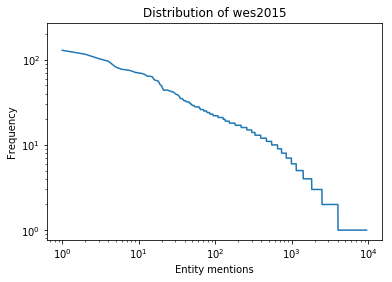

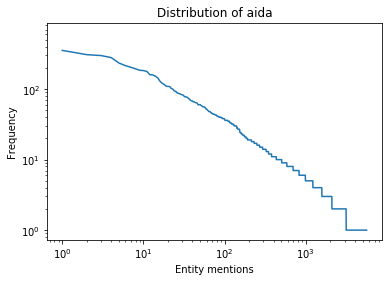

In [9]:
plot_utils.plot_freq_dist(wes_cnt, wes_title, loglog=True, b=10)
plot_utils.plot_freq_dist(aida_cnt, aida_title, loglog=True, b=10)


### Slope

In [11]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt)
wes_slope=plot_utils.calculate_slope(wes_cnt)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0034918839274364968, intercept=14.74113327668309, rvalue=-0.33804379109843619, pvalue=1.1032005815953184e-149, stderr=0.00012995643109834956)
LinregressResult(slope=-0.0010437738411112805, intercept=7.9647182552743745, rvalue=-0.49633270133837254, pvalue=0.0, stderr=1.8741711832404709e-05)


### AGDISTIS annotation

In [12]:
import systemparser

c=0
for article in aida_articles:
    original_content = article.content
    new_content=original_content
    for entity in reversed(article.entity_mentions):
        entity_span=new_content[entity.begin_index: entity.end_index]
        new_content=new_content[:entity.begin_index] + '<entity>' + entity_span + '</entity>' + new_content[entity.end_index:]

    results=systemparser.disambiguate(new_content)
    dis_entities={}
    for dis_entity in results:
        dis_entities[str(dis_entity['start'])] = utils.getLinkRedirect(utils.normalizeURL(dis_entity['disambiguatedURL']))
    for entity in article.entity_mentions:
        start = entity.begin_index
        dis_url = dis_entities[str(start)]
        entity.sys_link = dis_url
    c+=1
    print("Article %d" % c)
    if c==10000:
        break
        #x='<entity>Barack Obama</entity> arrives in <entity>Washington, D.C.</entity>, and bye <entity>Msdaser</entity>.'
#len(x)

Article 1
Article 2
Article 3
Article 4
Article 5
Article 6
Article 7
Article 8
Article 9
Article 10
Article 11
Article 12
Article 13
Article 14
Article 15
Article 16
Article 17
Article 18
Article 19
Article 20
Article 21
Article 22
Article 23
Article 24
Article 25
Article 26
Article 27
Article 28
Article 29
Article 30
Article 31
Article 32
Article 33
Article 34
Article 35
Article 36
Article 37
Article 38
Article 39
Article 40
Article 41
Article 42
Article 43
Article 44
Article 45
Article 46
Article 47
Article 48
Article 49
Article 50
Article 51
Article 52
Article 53
Article 54
Article 55
Article 56
Article 57
Article 58
Article 59
Article 60
Article 61
Article 62
Article 63
Article 64
Article 65
Article 66
Article 67
Article 68
Article 69
Article 70
Article 71
Article 72
Article 73
Article 74
Article 75
Article 76
Article 77
Article 78
Article 79
Article 80
Article 81
Article 82
Article 83
Article 84
Article 85
Article 86
Article 87
Article 88
Article 89
Article 90
Article 91
Article 

Article 693
Article 694
Article 695
Article 696
Article 697
Article 698
Article 699
Article 700
Article 701
Article 702
Article 703
Article 704
Article 705
Article 706
Article 707
Article 708
Article 709
Article 710
Article 711
Article 712
Article 713
Article 714
Article 715
Article 716
Article 717
Article 718
Article 719
Article 720
Article 721
Article 722
Article 723
Article 724
Article 725
Article 726
Article 727
Article 728
Article 729
Article 730
Article 731
Article 732
Article 733
Article 734
Article 735
Article 736
Article 737
Article 738
Article 739
Article 740
Article 741
Article 742
Article 743
Article 744
Article 745
Article 746
Article 747
Article 748
Article 749
Article 750
Article 751
Article 752
Article 753
Article 754
Article 755
Article 756
Article 757
Article 758
Article 759
Article 760
Article 761
Article 762
Article 763
Article 764
Article 765
Article 766
Article 767
Article 768
Article 769
Article 770
Article 771
Article 772
Article 773
Article 774
Article 775
Arti

Article 1347
Article 1348
Article 1349
Article 1350
Article 1351
Article 1352
Article 1353
Article 1354
Article 1355
Article 1356
Article 1357
Article 1358
Article 1359
Article 1360
Article 1361
Article 1362
Article 1363
Article 1364
Article 1365
Article 1366
Article 1367
Article 1368
Article 1369
Article 1370
Article 1371
Article 1372
Article 1373
Article 1374
Article 1375
Article 1376
Article 1377
Article 1378
Article 1379
Article 1380
Article 1381
Article 1382
Article 1383
Article 1384
Article 1385
Article 1386
Article 1387
Article 1388
Article 1389
Article 1390
Article 1391
Article 1392
Article 1393


### Chech if offsets between SYS and GOLD match for all entities

In [14]:
for articles in aida_articles:
    for entity in article.entity_mentions:
        if not entity.sys_link:
            print(entity.begin_index, entity.sys_link, entity.gold_link)

### Correct by URI

In [45]:
articles=aida_articles

In [46]:
correct_by_uri = defaultdict(int)
total_by_uri = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and entity.gold_link!='--NME--':
            if entity.sys_link==entity.gold_link:
                correct_by_uri[entity.gold_link]+=1
            total_by_uri[entity.gold_link]+=1

In [47]:
correct_by_uri

defaultdict(int,
            {'Rupert_Murdoch': 2,
             'News_Corporation': 8,
             'Fox_Broadcasting_Company': 1,
             'United_States': 121,
             'First_Pacific': 1,
             'The_Times': 4,
             'TV_Guide': 1,
             'HarperCollins': 2,
             'Greenwich_Mean_Time': 64,
             'South_Africa': 78,
             'Griqualand_West': 3,
             'Glen_Osborne': 3,
             'Africa_Cup_of_Nations': 6,
             'Central_African_Republic': 8,
             'Bangui': 8,
             'Jakarta': 18,
             'Indonesian_Democratic_Party': 3,
             'Megawati_Sukarnoputri': 5,
             'Surabaya': 6,
             'Nigeria': 46,
             'Academic_Staff_Union_of_Universities': 1,
             'London': 223,
             'Austria': 59,
             'Brian_Shimer': 3,
             'Antonio_Tartaglia': 2,
             'Italy': 157,
             'Pierre_Lueders': 2,
             'David_MacEachern': 2,
          

In [48]:
total_by_uri

defaultdict(int,
            {'Sydney': 19,
             'Rupert_Murdoch': 2,
             'Independence_Day_\\u0028film\\u0029': 2,
             'News_Corporation': 8,
             'Fox_Broadcasting_Company': 1,
             'United_States': 636,
             'United_States_dollar': 9,
             'First_Pacific': 1,
             'United_Kingdom': 280,
             'The_Sun_\\u0028United_Kingdom\\u0029': 3,
             'The_Times': 5,
             'TV_Guide': 1,
             'HarperCollins': 2,
             'San_Francisco': 6,
             'Greenwich_Mean_Time': 64,
             'Rugby_union': 18,
             'Griqualand_West': 4,
             'New_Zealand_national_rugby_union_team': 36,
             'Kimberley\\u002c_Northern_Cape': 1,
             'South_Africa': 78,
             'Glen_Osborne': 3,
             'France': 299,
             'Paris': 60,
             'AJ_Auxerre': 14,
             'Olympique_de_Marseille': 17,
             'Burundi_national_football_team': 5,
      

In [49]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
uris_by_count=defaultdict(set)
for uri, count in total_by_uri.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_uri[uri]
    agg_per_frequency[count]['t']+=count
    uris_by_count[count].add(uri)
print(agg_per_frequency)

OrderedDict([(19, {'c': 206, 't': 418}), (2, {'c': 1057, 't': 2082}), (8, {'c': 367, 't': 904}), (1, {'c': 1295, 't': 2468}), (636, {'c': 121, 't': 636}), (9, {'c': 243, 't': 711}), (280, {'c': 6, 't': 280}), (3, {'c': 723, 't': 1554}), (5, {'c': 628, 't': 1165}), (6, {'c': 485, 't': 966}), (64, {'c': 128, 't': 128}), (18, {'c': 203, 't': 306}), (4, {'c': 530, 't': 1412}), (36, {'c': 167, 't': 324}), (78, {'c': 78, 't': 156}), (299, {'c': 146, 't': 299}), (60, {'c': 45, 't': 240}), (14, {'c': 198, 't': 420}), (17, {'c': 114, 't': 323}), (11, {'c': 270, 't': 594}), (69, {'c': 40, 't': 69}), (27, {'c': 76, 't': 216}), (12, {'c': 119, 't': 372}), (49, {'c': 46, 't': 49}), (13, {'c': 117, 't': 299}), (234, {'c': 223, 't': 234}), (86, {'c': 59, 't': 86}), (215, {'c': 157, 't': 215}), (109, {'c': 69, 't': 218}), (354, {'c': 321, 't': 354}), (7, {'c': 386, 't': 896}), (16, {'c': 134, 't': 320}), (38, {'c': 57, 't': 190}), (55, {'c': 51, 't': 55}), (129, {'c': 125, 't': 129}), (87, {'c': 71, '

In [50]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, uris_by_count[key])
    accs[key]=acc

636 19.0251572327044 {'United_States'}
354 90.67796610169492 {'Germany'}
308 73.37662337662337 {'Russia'}
299 48.82943143812709 {'France'}
280 2.142857142857143 {'United_Kingdom'}
234 95.2991452991453 {'London'}
215 73.02325581395348 {'Italy'}
204 92.15686274509804 {'Australia'}
194 48.96907216494845 {'Israel'}
185 3.2432432432432434 {'Iraq'}
183 0.0 {'People\\u0027s_Republic_of_China'}
178 79.21348314606742 {'Spain'}
160 31.25 {'Netherlands'}
159 54.088050314465406 {'England'}
153 56.86274509803921 {'Japan'}
144 4.861111111111111 {'New_York_City'}
129 96.89922480620154 {'Belgium'}
121 93.38842975206612 {'Sweden'}
116 94.82758620689656 {'Bill_Clinton'}
110 100.0 {'Reuters'}
109 31.65137614678899 {'Europe', 'Canada'}
102 51.96078431372549 {'Poland'}
100 31.0 {'India'}
94 67.02127659574468 {'Chechnya'}
93 30.107526881720432 {'Brazil'}
88 38.63636363636363 {'United_Nations'}
87 81.60919540229885 {'Czech_Republic'}
86 68.6046511627907 {'Austria'}
84 88.0952380952381 {'Switzerland'}
83 19.2

In [51]:
print(agg_per_frequency)

OrderedDict([(19, {'c': 206, 't': 418}), (2, {'c': 1057, 't': 2082}), (8, {'c': 367, 't': 904}), (1, {'c': 1295, 't': 2468}), (636, {'c': 121, 't': 636}), (9, {'c': 243, 't': 711}), (280, {'c': 6, 't': 280}), (3, {'c': 723, 't': 1554}), (5, {'c': 628, 't': 1165}), (6, {'c': 485, 't': 966}), (64, {'c': 128, 't': 128}), (18, {'c': 203, 't': 306}), (4, {'c': 530, 't': 1412}), (36, {'c': 167, 't': 324}), (78, {'c': 78, 't': 156}), (299, {'c': 146, 't': 299}), (60, {'c': 45, 't': 240}), (14, {'c': 198, 't': 420}), (17, {'c': 114, 't': 323}), (11, {'c': 270, 't': 594}), (69, {'c': 40, 't': 69}), (27, {'c': 76, 't': 216}), (12, {'c': 119, 't': 372}), (49, {'c': 46, 't': 49}), (13, {'c': 117, 't': 299}), (234, {'c': 223, 't': 234}), (86, {'c': 59, 't': 86}), (215, {'c': 157, 't': 215}), (109, {'c': 69, 't': 218}), (354, {'c': 321, 't': 354}), (7, {'c': 386, 't': 896}), (16, {'c': 134, 't': 320}), (38, {'c': 57, 't': 190}), (55, {'c': 51, 't': 55}), (129, {'c': 125, 't': 129}), (87, {'c': 71, '

In [52]:
list(accs.values())

[19.0251572327044,
 90.67796610169492,
 73.37662337662337,
 48.82943143812709,
 2.142857142857143,
 95.2991452991453,
 73.02325581395348,
 92.15686274509804,
 48.96907216494845,
 3.2432432432432434,
 0.0,
 79.21348314606742,
 31.25,
 54.088050314465406,
 56.86274509803921,
 4.861111111111111,
 96.89922480620154,
 93.38842975206612,
 94.82758620689656,
 100.0,
 31.65137614678899,
 51.96078431372549,
 31.0,
 67.02127659574468,
 30.107526881720432,
 38.63636363636363,
 81.60919540229885,
 68.6046511627907,
 88.0952380952381,
 19.27710843373494,
 0.0,
 50.0,
 88.31168831168831,
 61.8421052631579,
 10.95890410958904,
 0.0,
 57.971014492753625,
 97.05882352941177,
 37.121212121212125,
 20.0,
 100.0,
 71.42857142857143,
 18.75,
 62.71186440677966,
 0.0,
 0.0,
 61.904761904761905,
 92.72727272727273,
 83.33333333333333,
 67.3076923076923,
 25.49019607843137,
 0.0,
 93.87755102040816,
 25.0,
 0.0,
 47.82608695652174,
 40.0,
 57.95454545454545,
 70.34883720930233,
 33.333333333333336,
 17.073170

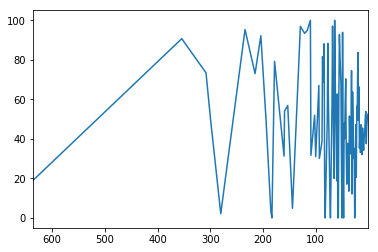

In [53]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### Correct by form-URI pairing

In [55]:
interpretations=defaultdict(set)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        interpretations[form].add(meaning)

In [59]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'RTRS': 2,
 'Bernard Hickey': 1,
 'SYDNEY': 1,
 'Rupert Murdoch': 1,
 'News Corp Ltd': 1,
 'Independence Day': 1,
 'News Corp': 1,
 'Fox Broadcasting': 1,
 'United States': 3,
 'News': 1,
 'A$': 1,
 'US$': 1,
 'First Pacific': 1,
 'Lachlan Drummond': 1,
 'U.S.': 2,
 'British': 2,
 'Asian Star TV': 1,
 'The Sun': 1,
 'The Times': 1,
 'TV Guide': 1,
 'Harper-Collins': 1,
 'Net Book Agreement': 1,
 'San Francisco': 2,
 'Sydney': 3,
 'GMT': 1,
 'Sydney Newsroom': 1,
 'RUGBY UNION': 1,
 'GRIQUALAND WEST': 1,
 'NEW ZEALAND': 2,
 'TOUR': 1,
 'KIMBERLEY': 1,
 'South Africa': 5,
 'Griqualand West': 1,
 'New Zealand': 3,
 'Andre Cloete': 1,
 'Leon van der Wath': 1,
 'Boeta Wessels': 1,
 'Wessels': 1,
 'Scott McLeod': 1,
 'Glen Osborne': 1,
 'Jon Preston': 1,
 'Preston': 3,
 'FRENCH': 2,
 'PARIS': 1,
 'French': 2,
 'Auxerre': 1,
 'Marseille': 2,
 'Burundi': 2,
 'African Cup': 1,
 'CAIRO': 1,
 'African Football Confederation': 1,
 'CAF': 1,
 'African Nations Cup': 1,
 'Central African Republic': 

In [70]:
interpretations['Marseille']

{'Marseille', 'Olympique_de_Marseille'}

### Aggregation per ambiguity

In [63]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [64]:
agg_per_ambiguity

defaultdict(int, {1: 10393, 2: 465, 3: 114, 4: 26, 5: 13, 6: 2, 7: 1, 13: 1})

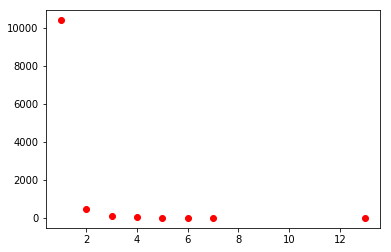

In [68]:
plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [69]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

622

#### This means that there are 622 out of ~11k forms that have some ambiguity in the data

### Aggregate per rank

In [78]:
correct_per_form=defaultdict(dict)
total_per_form=defaultdict(dict)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if ambiguity[form]==1:
            continue
        if meaning not in total_per_form[form]:
            total_per_form[form][meaning]=0
            correct_per_form[form][meaning]=0
        total_per_form[form][meaning]+=1
        if meaning==mention.sys_link:
            correct_per_form[form][meaning]+=1

In [81]:
total_per_form

defaultdict(dict,
            {'ABC': {'ABC_\\u0028newspaper\\u0029': 1,
              'American_Broadcasting_Company': 4},
             'ATLANTA': {'Atlanta': 3,
              'Atlanta_Braves': 23,
              'Atlanta_Falcons': 2,
              'Atlanta_Hawks': 3},
             'ATLANTIC': {'Atlantic_Division_\\u0028NBA\\u0029': 2,
              'Atlantic_Division_\\u0028NHL\\u0029': 2},
             'AUSTRALIA': {'Australia': 1,
              'Australia_national_cricket_team': 10,
              'Australia_national_rugby_union_team': 1},
             'AUSTRALIANS': {'Australia': 1,
              'Australia_national_cricket_team': 1},
             'AUSTRIA': {'Austria': 3, 'Austria_national_football_team': 3},
             'Abu Dhabi': {'Abu_Dhabi': 2,
              'Abu_Dhabi_\\u0028emirate\\u0029': 1},
             'Adams': {'--NME--': 1, 'Tony_Adams_\\u0028footballer\\u0029': 2},
             'Afrikaners': {'--NME--': 1, 'Afrikaner': 2},
             'Albanian': {'Albania': 15,
 

In [106]:
from operator import itemgetter

correct_per_rank=defaultdict(int)
total_per_rank=defaultdict(int)
for form, data in total_per_form.items():
    sorted_by_rank=sorted(data.items(), key=lambda x:x[1], reverse=True)
    rank=1
    for ranked_URI, freq in sorted_by_rank:
        correct_per_rank[rank]+=correct_per_form[form][ranked_URI]
        total_per_rank[rank]+=freq
        rank+=1

In [107]:
print(correct_per_rank)
print(total_per_rank)

defaultdict(<class 'int'>, {1: 3757, 2: 340, 3: 35, 4: 2, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0})
defaultdict(<class 'int'>, {1: 8782, 2: 1704, 3: 322, 4: 86, 5: 24, 6: 9, 7: 6, 8: 3, 9: 2, 10: 2, 11: 2, 12: 1, 13: 1})


In [108]:
acc_per_rank=defaultdict(float)
for rank, total in total_per_rank.items():
    acc_per_rank[rank]=correct_per_rank[rank]/total

In [109]:
acc_per_rank

defaultdict(float,
            {1: 0.42780687770439535,
             2: 0.19953051643192488,
             3: 0.10869565217391304,
             4: 0.023255813953488372,
             5: 0.08333333333333333,
             6: 0.0,
             7: 0.0,
             8: 0.0,
             9: 0.0,
             10: 0.0,
             11: 0.0,
             12: 0.0,
             13: 0.0})

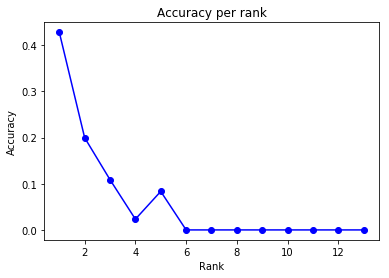

In [121]:
plt.plot(list(acc_per_rank.keys()), list(acc_per_rank.values()), 'b-o')
plt.title("Accuracy per rank")
plt.xlabel("Rank")
plt.ylabel("Accuracy")
plt.show()